In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

from scipy.stats import unitary_group
import matplotlib.pyplot as plt

import itertools
from functools import reduce

In [2]:
N = 2
dev = qml.device('default.qubit', wires=N)

The class $M$ of Maiorana-McFarland bent functions consists of the functions $f(x,y) := x\pi(y)^T + g(y)$, where $\pi$ is an arbitrary permutation of $\{0,1\}^n$ and $g$ is an arbitrary Boolean function depending on $y$ only.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.utils.random import sample_without_replacement

bc = load_breast_cancer()
idx = sample_without_replacement(len(bc.data), 50, random_state=0)
#print(idx)

bc.data = bc.data[idx]
bc.target = bc.target[idx]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA

ss = preprocessing.StandardScaler()
bc_stand = ss.fit(bc.data).transform(bc.data)

pca = PCA(n_components=N)
bc_pca = pca.fit(bc_stand).transform(bc_stand)

print("explained variance: ", pca.explained_variance_ratio_)  
print("singular values: ", pca.singular_values_) 

scaler = preprocessing.MinMaxScaler(feature_range=(0, np.pi))
bc_norm = scaler.fit(bc_pca).transform(bc_pca)

bc_proc = bc_norm
num_data = len(bc.target)
    
print("data length: ", num_data)
print(bc_proc)

explained variance:  [0.44160777 0.20815103]
singular values:  [25.73735912 17.66993329]
data length:  50
[[1.8148717  1.86906699]
 [0.63345468 0.77141652]
 [0.54585328 0.55793419]
 [0.63598819 0.53061221]
 [0.40867085 0.77053876]
 [0.71916857 1.48849061]
 [0.93397328 1.58789403]
 [0.47366984 1.25660539]
 [0.28475436 2.02258991]
 [0.71445791 2.21019762]
 [1.80558896 1.89797199]
 [0.92597555 0.79381881]
 [0.34958733 1.58722939]
 [1.17983218 0.28031599]
 [1.63412529 1.55584296]
 [1.97471276 1.63068645]
 [1.71500893 3.14159265]
 [2.13071255 0.07285857]
 [2.50959354 1.02545792]
 [3.14159265 0.58677635]
 [1.96276424 2.54137783]
 [1.91046476 1.45819052]
 [0.95566285 1.44162852]
 [0.58380367 1.16300668]
 [2.16616787 0.64157071]
 [0.49570661 0.94053336]
 [0.18887813 0.9479017 ]
 [2.27827257 2.80753321]
 [0.54030627 0.84114102]
 [2.44591635 0.94832253]
 [0.35418617 0.81333297]
 [1.90711044 0.07142547]
 [1.20995467 1.3117655 ]
 [1.62856642 0.93969521]
 [0.08378268 1.47288717]
 [1.69226118 1.7476

Now we add implicit features corresponding to the two-point all-pairs parity

$$
\phi_{i, j}(x) = (\pi - x_i)(\pi - x_j)
$$

In [5]:
from scipy.special import comb

new_features = np.zeros((num_data, int(comb(N, 2))))

for i in range(num_data):
    for (j, pair) in enumerate(itertools.combinations(range(N), r=2)):
        new_features[i, j] = (np.pi - bc_proc[i, pair[0]]) * (np.pi - bc_proc[i, pair[1]])

all_data = np.append(bc_proc, new_features, 1)
print(np.shape(bc_proc), np.shape(new_features), np.shape(all_data))
    
train_data, test_data, train_label, test_label = train_test_split(
    all_data, bc.target, test_size = 0.2, random_state=1)

num_train = int(0.8 * num_data)

print("train data: ", train_data)
print("test data: ", test_data)

(50, 2) (50, 1) (50, 3)
train data:  [[1.20995467 1.3117655  3.53456364]
 [1.85353871 1.29455219 2.37908775]
 [1.91046476 1.45819052 2.07248332]
 [0.72629396 0.82443544 5.59662677]
 [3.14159265 0.58677635 0.        ]
 [1.12109703 0.48601184 5.36558941]
 [2.22976365 2.25541306 0.80804426]
 [0.18887813 0.9479017  6.47734314]
 [0.95566285 1.44162852 3.71600226]
 [1.17983218 0.28031599 5.61313946]
 [0.63194713 1.68235835 3.66216084]
 [2.13071255 0.07285857 3.10212223]
 [3.00189567 0.         0.43887101]
 [2.16616787 0.64157071 2.43858337]
 [0.58380367 1.16300668 5.0608054 ]
 [0.40867085 0.77053876 6.47990489]
 [1.62856642 0.93969521 3.3315286 ]
 [1.63412529 1.55584296 2.39046591]
 [0.35418617 0.81333297 6.48980614]
 [1.80558896 1.89797199 1.6614818 ]
 [0.54030627 0.84114102 5.98413351]
 [1.66250761 1.95209787 1.75936394]
 [0.08378268 1.47288717 5.10258426]
 [2.50959354 1.02545792 1.33739527]
 [1.96276424 2.54137783 0.70755028]
 [0.49570661 0.94053336 5.82375206]
 [0.93397328 1.58789403 3.4

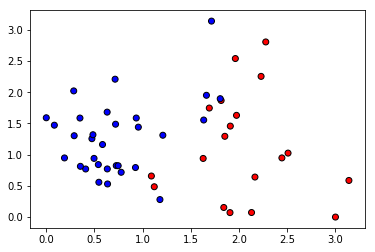

In [6]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.figure()
plt.scatter(bc_proc[:,0], bc_proc[:,1], c=bc.target,cmap=cm_bright, edgecolors='k')
plt.show()

In [7]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

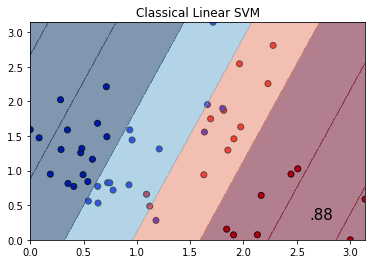

In [8]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(bc_proc.data, bc.target)

score = clf.score(bc_proc.data, bc.target)

x_min = y_min = 0
x_max = y_max = np.pi
h = .02  # step size in the mesh

cm = plt.cm.RdBu

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.decision_function(grid) 
Z = Z.reshape(xx.shape)

#for i in range(int(x_max / h)):
#    if Z[0, i] > 0:
#        print(Z[0, i], grid[i])

plt.figure()

plt.scatter(bc_proc[:,0], bc_proc[:,1], c=bc.target, cmap=cm_bright, edgecolors='k')
plt.contourf(xx, yy, Z, vmin=-1., vmax=1., cmap=cm, alpha=.5)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.title("Classical Linear SVM")
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

plt.show()

In [9]:
def U_phi(x):
    # x_2 = (pi - x_0)(pi - x_1)
    
    for i in range(N):
        qml.RZ( x[i], wires=0)
    
    
    for (j, pair) in enumerate(itertools.combinations(range(N), r=2)):
        qml.CNOT(wires=[pair[0], pair[1]])
        qml.RZ(x[N + j], pair[1])
        qml.CNOT(wires=[pair[0], pair[1]])

In [10]:
def featuremap(x):
    layers = 2
    for i in range(layers):
        for j in range(N):
            qml.Hadamard(wires=j)
        U_phi(x)

In [11]:
def layer(W): # 6 weights are specified at each layer
    
    for i in range(N): 
        if i == (N-1):
            qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
            qml.Rot(W[N-1, 0], W[N-1, 1], W[N-1, 2], wires=N-1)
            
            qml.CNOT(wires=[0, N-1])
        else: 
            # euler angles
            qml.Rot(W[i, 0], W[i, 1], W[i, 2], wires=i)
            qml.Rot(W[i+1, 0], W[i+1, 1], W[i+1, 2], wires=i + 1)

            qml.CNOT(wires=[i, i+1])

In [12]:
@qml.qnode(dev)
def circuit(weights, x, n=0):

    featuremap(x)

    for W in weights:
        layer(W)

    return qml.expval.PauliZ(wires=n)

In [13]:
def variational_classifier(var, x): # x is a keyword argument -> fixed (not trained)
    weights = var[0]
    bias = var[1]
    
    exp_Z = circuit(weights, x, n=0)
    for i in range(1, N):
        #print("computing expectation at index {0}".format(i))
        e = circuit(weights,x,n=i)
        exp_Z *= e

    return exp_Z + bias

In [14]:
def square_loss(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2
    loss = loss / len(labels)

    return loss

In [15]:
def accuracy(labels, predictions):
    #print(labels, predictions)
    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

In [16]:
def cost(var, X, Y):

    predictions = [variational_classifier(var, x) for x in X]
    #if (len(Y) == num_data):
    #    print("[(pred, label), ...]: ", list(zip(predictions, Y)))
    
    sq_l = square_loss(Y, predictions) 
    
    #print("square loss: ", sq_l)
    return sq_l

In [17]:
num_qubits = N
num_layers = 4
var_init = (0.01 * np.random.randn(num_layers, num_qubits, 3), 0.0)

In [18]:
num_iterations = 10

def train_and_test(X, Y, X_train, Y_train, X_test, Y_test):
    opt = NesterovMomentumOptimizer(0.01)
    batch_size = 5

    # train the variational classifier
    var = var_init
    
    test_accuracies = []
    train_accuracies = []
    costs = []
    for it in range(num_iterations):

        # Update the weights by one optimizer step
        batch_index = np.random.randint(0, num_train, (batch_size, ))
        X_train_batch = X_train[batch_index]
        Y_train_batch = Y_train[batch_index]
        var = opt.step(lambda v: cost(v, X_train_batch, Y_train_batch), var)

        # Compute predictions on train and validation set
        predictions_train = [np.sign(variational_classifier(var, f)) for f in X_train]
        predictions_test = [np.sign(variational_classifier(var, f)) for f in X_test]

        # Compute accuracy on train and validation set
        acc_train = accuracy(Y_train, predictions_train)
        acc_test = accuracy(Y_test, predictions_test)
        
        # Compute cost on all samples
        c = cost(var, X, Y)
        
        costs.append(c)
        test_accuracies.append(acc_test)
        train_accuracies.append(acc_train)
        
        print("Iter: {:5d} | Cost: {:0.7f} | Acc train: {:0.7f} | Acc validation: {:0.7f} "
              "".format(it+1, c, acc_train, acc_test))
        
    return train_accuracies, test_accuracies, costs, var

In [19]:
#thresholds = [0.0, 0.1, 0.2, 0.3]
thresholds = [0.2]
thresh_test_accuracies = []
thresh_train_accuracies = []
thresh_costs = []
    
for thresh in thresholds:
        trn_ac, tst_ac, costs, var = train_and_test(
            all_data, bc.target, train_data, train_label, test_data, test_label)
        thresh_train_accuracies.append(trn_ac)
        thresh_test_accuracies.append(tst_ac)
        thresh_costs.append(costs)
        print("Var: ", var)
        
print(thresh_test_accuracies)
print(thresh_train_accuracies)
print(thresh_costs)

Iter:     1 | Cost: 0.8028539 | Acc train: 0.3250000 | Acc validation: 0.5000000 
Iter:     2 | Cost: 0.7539144 | Acc train: 0.4250000 | Acc validation: 0.5000000 
Iter:     3 | Cost: 0.6873793 | Acc train: 0.4500000 | Acc validation: 0.5000000 
Iter:     4 | Cost: 0.6087809 | Acc train: 0.4750000 | Acc validation: 0.5000000 
Iter:     5 | Cost: 0.5313654 | Acc train: 0.4750000 | Acc validation: 0.5000000 
Iter:     6 | Cost: 0.4586933 | Acc train: 0.4750000 | Acc validation: 0.5000000 
Iter:     7 | Cost: 0.3908726 | Acc train: 0.5250000 | Acc validation: 0.5000000 
Iter:     8 | Cost: 0.3346818 | Acc train: 0.5500000 | Acc validation: 0.5000000 
Iter:     9 | Cost: 0.2888206 | Acc train: 0.6250000 | Acc validation: 0.5000000 
Iter:    10 | Cost: 0.2535590 | Acc train: 0.6500000 | Acc validation: 0.5000000 
Var:  [array([[[-2.60128191e-02,  5.82996876e-02, -1.66935050e-02],
        [-3.05858914e-02, -4.61731980e-02, -2.32195456e-02]],

       [[-2.78471690e-02,  5.21892190e-02, -9.492

In [21]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
        
    block = int(round(bar_length * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [23]:
score = thresh_train_accuracies[0][-1]

x_min = y_min = 0
x_max = y_max = np.pi
h = 0.1  # step size in the mesh

cm = plt.cm.RdBu

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([])

for i, f in enumerate(grid):    
    Z = np.append(Z, np.sign(variational_classifier(var, [f, (np.pi - f[0])*(np.pi - f[1])])))
    update_progress(i / len(grid))
 
update_progress(1)
Z = Z.reshape(xx.shape)

Progress: [####################] 100.0%


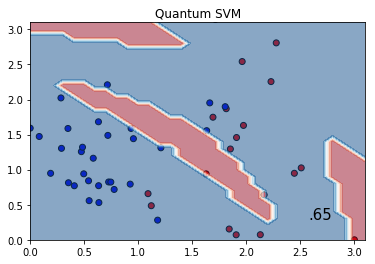

In [25]:
plt.figure()

plt.scatter(bc_proc[:,0], bc_proc[:,1], c=bc.target, cmap=cm_bright, edgecolors='k')
plt.contourf(xx, yy, Z, vmin=-1., vmax=1., cmap=cm, alpha=.5)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.title("Quantum SVM")

plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

plt.show()